Example 30 - Natural frequencies, mode shapes and natural frenquency map of a rigid rotor
=====
This example is based on Example 3.6.1, Example 3.7.1 and Example 3.7.2 from {cite}`friswell2010dynamics`.

In [8]:
import ross as rs
from ross.units import Q_
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt

# Set default plot renderer
pio.renderers.default = "notebook"

## Creating shaft element

In [9]:
"""
Creates shaft elements with specified geometry and material properties.
"""
# Material Definition - Steel
steel = rs.Material(name="Steel", rho=7810, E=211e9, G_s=81.2e9)

# Shaft Geometry Parameters
shaft_length = 0.5  # [m]
shaft_diameter = 0.2  # [m]
num_elements = 5
element_length = shaft_length / num_elements

# Create shaft elements
shaft_elements = [
    rs.ShaftElement(
        L=element_length,
        idl=0.0,  # inner diameter (solid shaft)
        odl=shaft_diameter,
        material=steel,
        shear_effects=True,
        rotary_inertia=True,
        gyroscopic=True,
    ) 
    for _ in range(num_elements)
]

## Example 3.6.1

Determine the natural frequencies and the mode shapes of the rigid rotor of Example 3.5.1 for the following:

(a) The horizontal and vertical support stiffnesses are 1.0 MN/m at bearing 1 and 1.3 MN/m at bearing 2 and the rotor spins at 4,000 rev/min. 

(b) The horizontal and vertical support stiffnesses are 1.0 and 1.1 MN/m, respectively, at bearing 1, and 1.3 and 1.4 MN/m, respectively, at bearing 2. Note that the bearings are anisotropic. Obtain the natural frequencies and mode shapes when the rotor is stationary and also rotating at 4,000 and 8,000 rev/min.

### Rotor assembly 

In [10]:
"""
Creates rotor assemblies for each case.
"""

# Bearing configuration for case (a)
bearings_a = [
    rs.BearingElement(n=0, kxx=1.0e6, kyy=1.0e6, cxx=0),  # Bearing 1
    rs.BearingElement(n=5, kxx=1.3e6, kyy=1.3e6, cxx=0)   # Bearing 2
]

# Bearing configuration for case (b)
bearings_b = [
    rs.BearingElement(n=0, kxx=1.0e6, kyy=1.1e6, cxx=0),  # Bearing 1 (anisotropic)
    rs.BearingElement(n=5, kxx=1.3e6, kyy=1.4e6, cxx=0)   # Bearing 2 (anisotropic)
]
    
# Create rotor assembly for case (a)
rotor_a = rs.Rotor(shaft_elements=shaft_elements, bearing_elements=bearings_a)

# Create rotor assembly for case (b)
rotor_b = rs.Rotor(shaft_elements=shaft_elements, bearing_elements=bearings_b)

# Plot rotor configuration for case (a), same as case (b)
rotor_a.plot_rotor().show()

### Case (a) analyze

In [11]:
"""
Analyzes case (a) from Example 3.6.1:
- Isotropic bearings (same stiffness in x and y directions)
- Rotor speed: 4000 RPM
"""
# Run modal analysis at 4000 rpm
modal_results_a = rotor_a.run_modal(speed=Q_(4000, "RPM"), num_modes=8)

# Print natural frequencies
print("\nCase (a) Results - Isotropic Bearings at 4000 RPM:")
print(f"Natural Frequencies: {Q_(modal_results_a.wd, 'rad/s').to('Hz'):.2f}")

# Plot mode shapes
print("\nMode Shapes:")
for mode in range(4):
    modal_results_a.plot_mode_3d(
        mode=mode, 
        frequency_units="Hz", 
        damping_parameter="damping_ratio"
    ).show()


Case (a) Results - Isotropic Bearings at 4000 RPM:
Natural Frequencies: [21.33 21.58 29.58 43.61] Hz

Mode Shapes:


### Case (b) analyze

In [12]:
"""
Analyzes case (b) from Example 3.6.1:
- Anisotropic bearings (different stiffness in x and y directions)
- Multiple rotor speeds: 0, 4000, and 8000 RPM
"""

# Analyze at different speeds
speeds = [0, 4000, 8000]  # RPM
modal_results = []


# Print natural frequencies and plot mode shapes for each speed
for speed in speeds:
    results = rotor_b.run_modal(speed=Q_(speed, "RPM"), num_modes=8)
    modal_results.append(results)
    
    # Print natural frequencies
    print(f"\nCase (b) Results - Anisotropic Bearings at {speed} RPM:")
    print(f"Natural Frequencies: {Q_(results.wd, 'rad/s').to('Hz'):.2f}")

    # Plot mode shapes
    print(f"\nMode Shapes at {speed} RPM:")
    for mode in range(4):
        results.plot_mode_3d(
            mode=mode,
            frequency_units="Hz",
            damping_parameter="damping_ratio"
        ).show()


Case (b) Results - Anisotropic Bearings at 0 RPM:
Natural Frequencies: [21.50 22.46 35.84 37.34] Hz

Mode Shapes at 0 RPM:



Case (b) Results - Anisotropic Bearings at 4000 RPM:
Natural Frequencies: [21.44 22.43 30.26 44.39] Hz

Mode Shapes at 4000 RPM:



Case (b) Results - Anisotropic Bearings at 8000 RPM:
Natural Frequencies: [21.13 22.31 25.63 53.48] Hz

Mode Shapes at 8000 RPM:


## Example 3.7.1

Plot the natural frequency maps for rotor spin speeds up to 20,000 rev/min for the rigid rotor described in Example 3.5.1, supported by the following bearing stiffnesses:

(a) kx1 = 1.0 MN/m, ky1 = 1.0 MN/m, kx2 = 1.0 MN/m, ky2 = 1.0 MN/m

(b) kx1 = 1.0 MN/m, ky1 = 1.0 MN/m, kx2 = 1.3 MN/m, ky2 = 1.3 MN/m

(c) kx1 = 1.0 MN/m, ky1 = 1.5 MN/m, kx2 = 1.0 MN/m, ky2 = 1.5 MN/m

(d) kx1 = 1.0 MN/m, ky1 = 1.5 MN/m, kx2 = 1.3 MN/m, ky2 = 2.0 MN/m

### Rotor assembly and campbell plot

In [13]:
"""
Creates rotor assemblies for each bearing case and plot campbell diagram.
"""

bearing_configs = {
    "(a)": [(1.0e6, 1.0e6), (1.0e6, 1.0e6)],
    "(b)": [(1.0e6, 1.0e6), (1.3e6, 1.3e6)],
    "(c)": [(1.0e6, 1.5e6), (1.0e6, 1.5e6)],
    "(d)": [(1.0e6, 1.5e6), (1.3e6, 2.0e6)],
}

# Speed range (rad/s)
speed_range = np.linspace(0, Q_(20000, "RPM"), 100)

# Run Campbell diagram for each case
for case, ((kxx1, kyy1), (kxx2, kyy2)) in bearing_configs.items():
    bearing1 = rs.BearingElement(n=0, kxx=kxx1, kyy=kyy1, cxx = 0)
    bearing2 = rs.BearingElement(n=5, kxx=kxx2, kyy=kyy2, cxx = 0)

    # Rotor Assembly
    rotor = rs.Rotor(
        shaft_elements=shaft_elements,
        bearing_elements=[bearing1, bearing2]
    )

    # Campbell diagram plot    
    campbell = rotor.run_campbell(speed_range=speed_range, frequencies=4)
    campbell.plot(title=f"Campbell Diagram - Case {case}", frequency_units="Hz").show()

## Example 3.7.2

Determine the effect of varying the stiffness of bearing 2 for the rigid rotor as described in Example 3.5.1 for a rotor spin speed of 5,000 rev/min. Assume the bearing is isotropic and vary kx2 = ky2 in the range 0.4 to 2.0 MN/m. 

The properties of bearing 1 are:

(a) kx1 = 1.0 MN/m, ky1 = 1.0 MN/m

(b) kx1 = 1.0 MN/m, ky1 = 2.0 MN/m

### Rotor assembly and natural frequency maps 

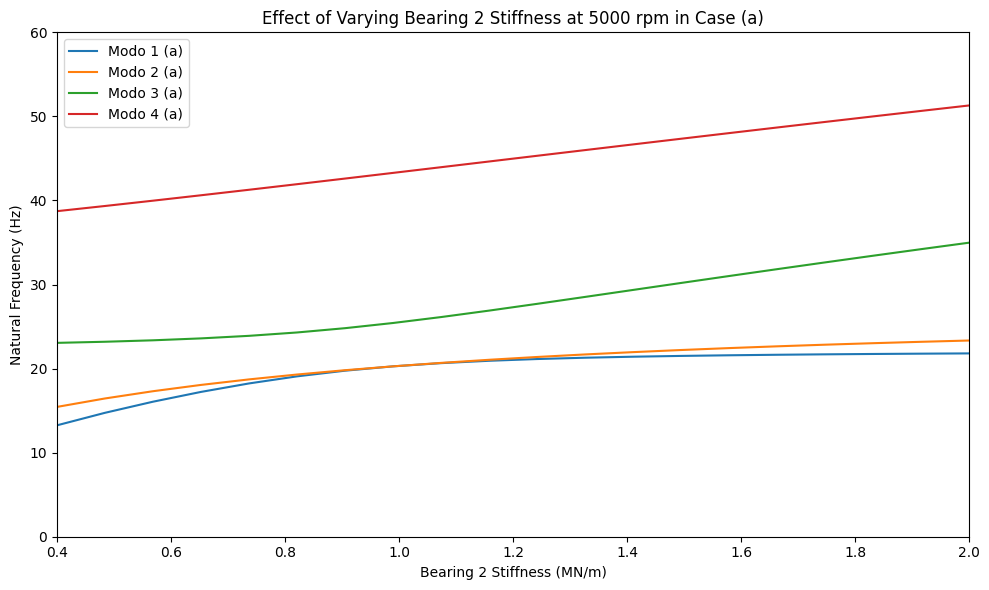

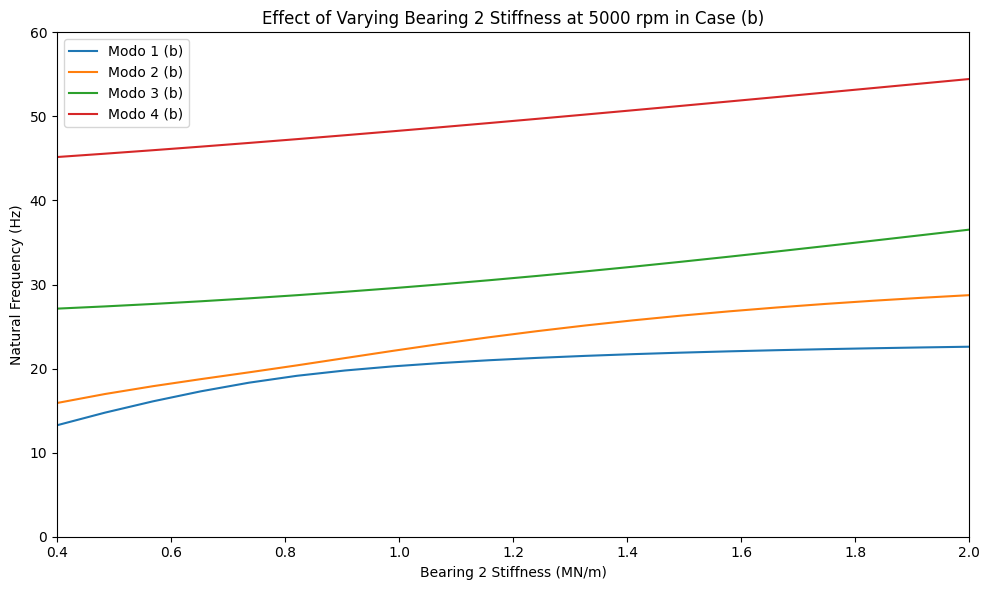

In [14]:
"""
Creates rotor assemblies for each bearing case and plot natural frequency maps.
"""

# Rotor speed (rpm to rad/s)
rotor_speed = Q_(5000, "RPM")

# Stiffness range for Bearing 2 (MN/m -> N/m)
k2_values = np.linspace(0.4e6, 2.0e6, 20)

# Bearing 1 configurations
bearing1_cases = {
    "(a)": (1.0e6, 1.0e6),
    "(b)": (1.0e6, 2.0e6),
}

# Loop over bearing1 cases
for label, (kxx1, kyy1) in bearing1_cases.items():
    modes = []
    for k in k2_values:
        bearing0 = rs.BearingElement(n=0, kxx=kxx1, kyy=kyy1, cxx = 0)
        bearing1 = rs.BearingElement(n=5, kxx=k, kyy=k, cxx = 0)  # Isotropic

        rotor = rs.Rotor(
            shaft_elements=shaft_elements,
            bearing_elements=[bearing0, bearing1]
        )

        modal = rotor.run_modal(speed=rotor_speed)
        modes.append(modal.wn[:4])  # First two natural frequencies
        
    # Plot setup
    plt.figure(figsize=(10, 6))

    modes = np.array(modes)
    for i in range(4):
        plt.plot(k2_values / 1e6, modes[:, i] / (2*np.pi), label=f'Modo {i+1} {label}')

    # Plot adjustments
    plt.xlabel("Bearing 2 Stiffness (MN/m)")
    plt.ylabel("Natural Frequency (Hz)")
    plt.title(f"Effect of Varying Bearing 2 Stiffness at 5000 rpm in Case {label}")
    plt.legend()
    plt.xlim(0.4, 2)
    plt.ylim(0, 60)
    plt.tight_layout()
    plt.show()

